## Get all the costs results :

In [1]:
import pandas as pd
#sourceCPLEX = "D:/DTU-Courses/DTU-Thesis/berth_allocation/MCBAP-multi-port-berth-allocation-problem/results_jobs/benchmarks_CPLEX/CPLEX_N4_N15_results_5min.csv"
sourceCPLEX = "D:/DTU-Courses/DTU-Thesis/berth_allocation/results_jobs/benchmarks_CPLEX/CPLEX_NLarge_results_2400s_all.csv"
sourceHeur = "D:/DTU-Courses/DTU-Thesis/berth_allocation/results_jobs/benchmarks_HEUR"
algo_folder="finalGRASP"
expnb=5
exp="GRASPonly1"
Nmin=11
Nmax=15

def get_results_cost(type):
    dataCPLEX = pd.read_csv(sourceCPLEX)
    if type == 'large':
        dataHeur = pd.read_csv(f"{sourceHeur}/{algo_folder}/{exp}/NLarge_concatenete.csv")
    else:
        for i in range(Nmin, Nmax):
            this_dataHeur = pd.read_csv(f"{sourceHeur}/{algo_folder}/{exp}/N{i}_N{i}.csv")
            dataHeur = pd.concat([dataHeur, this_dataHeur], ignore_index=True)
    merged_df = pd.merge(dataCPLEX, dataHeur, how='inner', on=['Seed', 'N', 'Nout', 'qli'])
    merged_df["diff"] = (merged_df["HeurCost"] - merged_df["CPLEX"])/merged_df["CPLEX"]*100
    if type == 'large':
        merged_df.to_csv(f"{sourceHeur}/{algo_folder}/{exp}/Large_diff_{exp}.csv", index=False)
    else:
        merged_df.to_csv(f"{sourceHeur}/{algo_folder}/{exp}/N{Nmin}_N{Nmax}_diff{exp}.csv", index=False)
    return merged_df
merged_df = get_results_cost('large')


In [2]:
mean_diff = merged_df.groupby(['N', 'Nout'])['diff'].mean().reset_index()
mean_diff

,N,Nout,diff
0,0,0,NaN
1,30,5,12.445444
2,30,10,11.891531
3,50,5,8.384360
4,50,10,-1.501219


In [40]:
mean_diff = merged_df.groupby(['N', 'Nout'])['diff'].mean().reset_index()
mean_diff

,N,Nout,diff
0,0,0,NaN
1,30,5,7.699111
2,30,10,11.284027
3,50,5,1.367053
4,50,10,1.087931


## Get results in json :

In [3]:
from getdict_results import *

In [4]:
seed=2
Nin=30
qli=10
Nout=5

## Get vizualization from the sol 

In [5]:
file = "D:/DTU-Courses/DTU-Thesis/berth_allocation/results_jobs/benchmarks_CPLEX/sols_2400s/CPLEX_sol_{}_{}_{}_{}.csv".format(seed,Nin,Nout,qli)
results_sol = pd.read_csv(file)
listx=list(results_sol[results_sol['first']=='x']['second'])[0].replace(' ','').split('\n')
listx

['[1,1]=111.0',
 '[1,2]=1.0',
 '[10,1]=156.0',
 '[10,2]=4.0',
 '[10,3]=153.0',
 '[11,1]=144.0',
 '[11,2]=88.0',
 '[12,1]=131.0',
 '[12,2]=104.0',
 '[13,1]=129.0',
 '[13,2]=121.0',
 '[13,3]=88.0',
 '[14,1]=123.0',
 '[14,2]=1.0',
 '[15,1]=6.0',
 '[15,2]=9.0',
 '[16,1]=34.0',
 '[16,2]=1.0',
 '[17,1]=68.0',
 '[17,2]=114.0',
 '[18,1]=52.0',
 '[18,2]=4.0',
 '[18,3]=123.0',
 '[19,1]=34.0',
 '[19,2]=156.0',
 '[19,3]=67.0',
 '[2,1]=118.0',
 '[2,2]=58.0',
 '[20,1]=1.0',
 '[20,2]=34.0',
 '[21,1]=124.0',
 '[21,2]=91.0',
 '[22,1]=124.0',
 '[22,2]=31.0',
 '[22,3]=153.0',
 '[23,1]=64.0',
 '[23,2]=79.0',
 '[24,1]=31.0',
 '[24,2]=91.0',
 '[25,1]=34.0',
 '[25,2]=93.0',
 '[26,1]=34.0',
 '[26,2]=34.0',
 '[26,3]=34.0',
 '[27,1]=84.0',
 '[27,2]=91.0',
 '[28,1]=1.0',
 '[28,2]=118.0',
 '[29,1]=31.0',
 '[29,2]=31.0',
 '[3,1]=98.0',
 '[3,2]=39.0',
 '[3,3]=8.0',
 '[30,1]=7.0',
 '[30,2]=64.0',
 '[30,3]=150.0',
 '[31,1]=91.0',
 '[32,1]=61.0',
 '[33,1]=1.0',
 '[34,1]=121.0',
 '[35,1]=61.0',
 '[36,1]=1.0',
 '[37,1]=

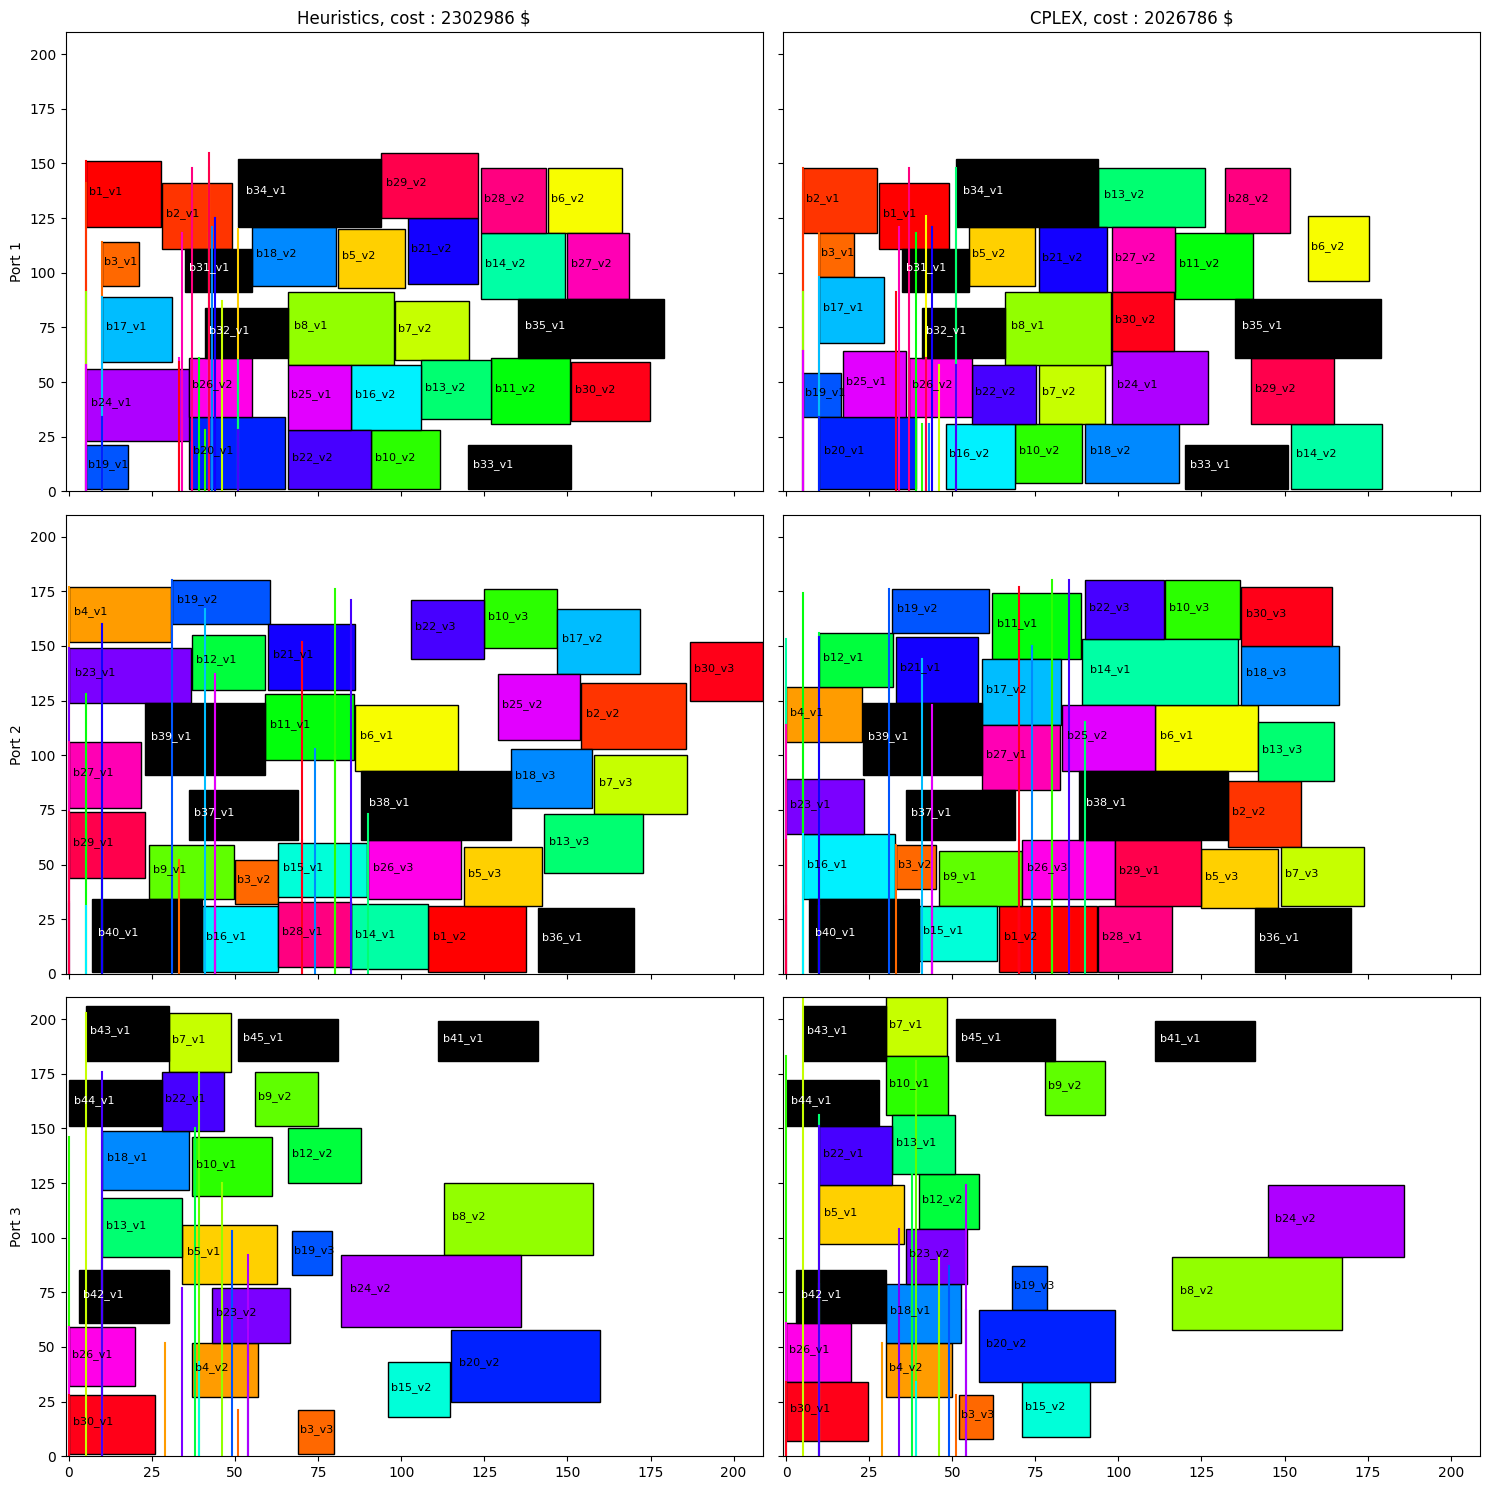

In [7]:
from make_graphs import *
getgraphs_port(algo_folder, exp, seed,Nin,Nout,qli, 'large', 5)

### Get visu from iteration :

In [11]:
#from make_graphs import *
#getgraphs_port_withiter(algo_folder, exp, seed,Nin,Nout,qli,13, 'large', 5, withcplex=False)

## Cost analysis

- The cost of each visit in a bar graph with colors for each type of cost
- Looking at the time evolution (along iter) for the heuristic and the local search
- Same thing for the when evolution for each visit
- Same thing for the proba

--> Put everything, per solution and per iteration in a dataset.... (could use r)

In [8]:
dataset = make_datasetiterSoft(algo_folder=algo_folder, exp=exp, seed=seed,Nin=Nin,Nout=Nout,qli=qli)
#for col in ['delay_cost_visit', 'penalty_visit', 'fuel_cost_visit', 'handling_cost_visit', 'waiting_cost_visit','n','c', 'when']:
#    dataset[col] = dataset[col].astype(int)

In [9]:
dataset

,iter,inst,objectif,cost_solheur,delay_cost_solheur,waiting_cost_solheur,penalty_solheur,handling_cost_solheur,fuel_cost_solheur,cost_sollocal,...,allboatscost,rateconstained,failed,better,reconstruct,pathrelinking,usedLocalSearch,average_cost_elite,average_dist_elite,pushimprove
0,1,NaN,3.079446e+06,3564385.0,1645799.0,100922.0,516793.0,371999.0,928875.0,3079447.0,...,"[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3333333333333333, 0.3333333333333333, 0.333...",0.0,0.0,0.0,0,1,0.0,0.0,None
1,2,NaN,2.531777e+06,2933776.0,1407856.0,249336.0,21528.0,383558.0,871500.0,2531777.0,...,"[1.9748973459826685e-07, 0.49999990125513266, ...","[0.3333333333333333, 0.3333333333333333, 0.333...",0.0,0.0,0.0,0,1,0.0,0.0,None
2,3,NaN,2.702724e+06,3003353.0,1341483.0,163600.0,240937.0,342322.0,915012.0,2702724.0,...,"[0.406950492629001, 0.2887376546746684, 0.3043...","[0.3333333333333333, 0.3333333333333333, 0.333...",0.0,0.0,0.0,0,1,0.0,0.0,None
3,4,NaN,4.087812e+06,4087812.0,1651918.0,134101.0,881385.0,413479.0,1006932.0,4087812.0,...,"[0.360035524785572, 0.30051041867676176, 0.339...","[0.3333333333333333, 0.3333333333333333, 0.333...",0.0,0.0,0.0,0,0,0.0,0.0,None
4,5,NaN,3.779191e+06,3779191.0,1745263.0,209342.0,543674.0,358411.0,922502.0,3779191.0,...,"[0.3708672658518466, 0.38214017436293, 0.24699...","[0.3333333333333333, 0.3333333333333333, 0.333...",0.0,0.0,0.0,0,0,0.0,0.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1509,1510,NaN,3.445063e+06,3445064.0,1557363.0,195668.0,436673.0,351042.0,904319.0,3445064.0,...,"[0.3689399715454009, 0.38535102048976916, 0.24...","[0.3333333333333333, 0.3333333333333333, 0.333...",0.0,0.0,0.0,0,0,0.0,0.0,None
1510,1511,NaN,5.130748e+06,5130749.0,2330776.0,228609.0,1229694.0,390651.0,951020.0,5130749.0,...,"[0.3689399715454009, 0.38535102048976916, 0.24...","[0.3333333333333333, 0.3333333333333333, 0.333...",0.0,0.0,0.0,0,0,0.0,0.0,None
1511,1512,NaN,3.427917e+06,3427917.0,1518709.0,175011.0,426044.0,410435.0,897721.0,3427917.0,...,"[0.3689399715454009, 0.38535102048976916, 0.24...","[0.3333333333333333, 0.3333333333333333, 0.333...",0.0,0.0,0.0,0,0,0.0,0.0,None
1512,1513,NaN,3.819173e+06,3819173.0,2041777.0,302082.0,181647.0,446385.0,847286.0,3819173.0,...,"[0.3689399715454009, 0.38535102048976916, 0.24...","[0.3333333333333333, 0.3333333333333333, 0.333...",0.0,0.0,0.0,0,0,0.0,0.0,None


In [10]:
print("Nb of iteration :")
print(max(dataset['iter']))

Nb of iteration :
1514


In [11]:
dataset.columns

Index(['iter', 'inst', 'objectif', 'cost_solheur', 'delay_cost_solheur',
       'waiting_cost_solheur', 'penalty_solheur', 'handling_cost_solheur',
       'fuel_cost_solheur', 'cost_sollocal', 'delay_cost_sollocal',
       'waiting_cost_sollocal', 'penalty_sollocal', 'handling_cost_sollocal',
       'fuel_cost_sollocal', 'timeheur', 'timelocal', 'oneboatdistance',
       'oneboatcost', 'oneboattime', 'allboatsdist', 'allboatstime',
       'allboatscost', 'rateconstained', 'failed', 'better', 'reconstruct',
       'pathrelinking', 'usedLocalSearch', 'average_cost_elite',
       'average_dist_elite', 'pushimprove'],
      dtype='object')

## With the visits :

### The cost for each visit during the heuristic :

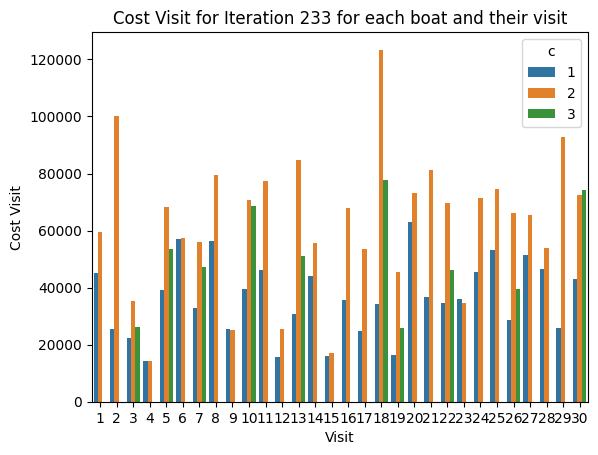

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the dataset to only include the desired iteration and boats
subset = dataset[(dataset['iter'] == iteration_number) & (dataset['n'] <= Nin)]

# Create a new figure and axis object
fig, ax = plt.subplots()

# Use seaborn's barplot function to create the plot
sns.barplot(x='n', y='cost_visit', hue='c', data=subset, ax=ax)

# Set the title and axis labels
ax.set_title(f"Cost Visit for Iteration {iteration_number} for each boat and their visit")
ax.set_xlabel("Visit")
ax.set_ylabel("Cost Visit")

# Show the plot
plt.show()


### The stacked costs now :

C:\Users\kerve\AppData\Local\Temp\ipykernel_39340\3078143974.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iter[col] = df_iter[col].astype(int)


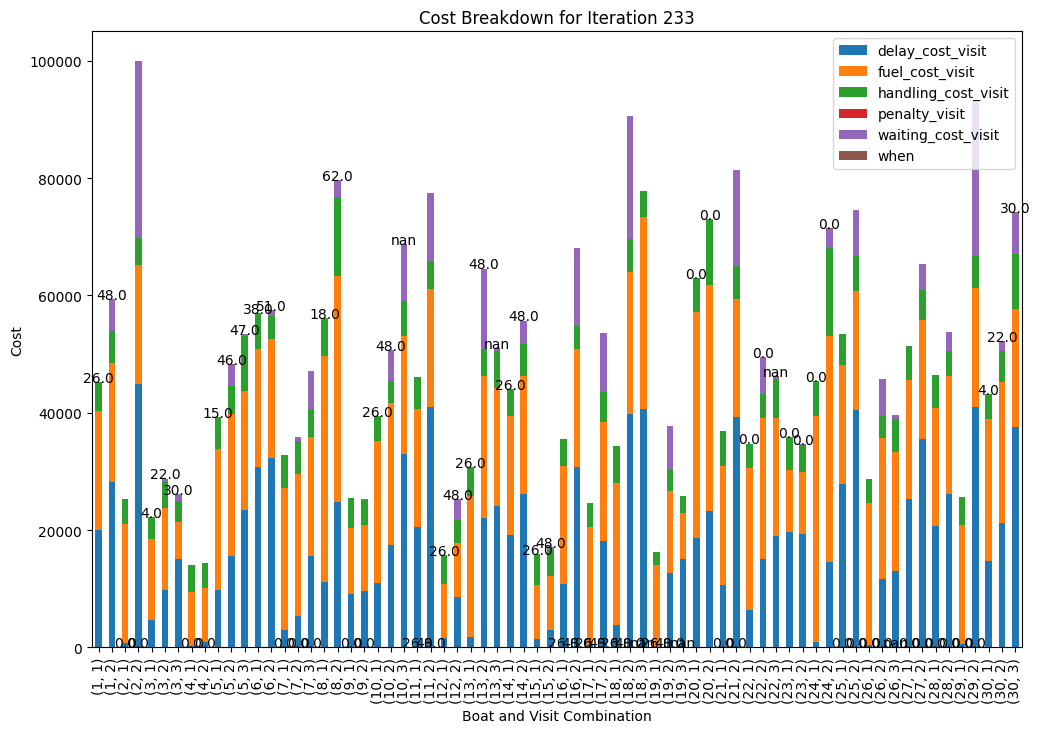

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# filter dataset for selected iteration
df_iter = dataset[dataset['iter'] == iter_to_plot]

for col in ['delay_cost_visit', 'penalty_visit', 'fuel_cost_visit', 'handling_cost_visit', 'waiting_cost_visit', 'n', 'c']:
    df_iter[col] = df_iter[col].astype(int)

# create a pivot table to group data by boat and visit
df_pivot = pd.pivot_table(df_iter[['delay_cost_visit', 'penalty_visit', 'fuel_cost_visit', 'handling_cost_visit', 'waiting_cost_visit', 'n', 'c', 'when']],
                           values=['delay_cost_visit', 'penalty_visit', 'fuel_cost_visit', 'handling_cost_visit', 'waiting_cost_visit', 'when'],
                           index=['n', 'c'])

# create stacked bar plot
ax = df_pivot.plot(kind='bar', stacked=True, figsize=(12, 8))

# add labels and title
ax.set_xlabel('Boat and Visit Combination')
ax.set_ylabel('Cost')
ax.set_title(f'Cost Breakdown for Iteration {iter_to_plot}')



for i in range(0,len(ax.get_xticklabels())):
    p=ax.patches[i+5*len(ax.get_xticklabels())]
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height()
    nc = ax.get_xticklabels()[i].get_text()
    ax.text(_x, _y, np.mean(df_iter[(df_iter['n']==int(nc.split(',')[0][1])) & (df_iter['c']==int(nc.split(',')[1][1]))]['when']), ha="center")
    


# show plot
plt.show()


### Now along all the iterations :

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# create a pivot table to group data by boat and visit, and calculate the mean of each cost across all iterations
df_pivot = pd.pivot_table(dataset, values=['delay_cost_visit', 'penalty_visit', 'fuel_cost_visit', 'handling_cost_visit', 'waiting_cost_visit'], index=['n', 'c'], aggfunc='mean')

# create stacked bar plot
ax = df_pivot.plot(kind='bar', stacked=True, figsize=(12, 8))

# add labels and title
ax.set_xlabel('Boat and Visit Combination')
ax.set_ylabel('Cost')
ax.set_title('Average Cost Breakdown Across All Iterations')

# show plot
plt.show()


KeyError: 'delay_cost_visit'

### When are they appearing  ?

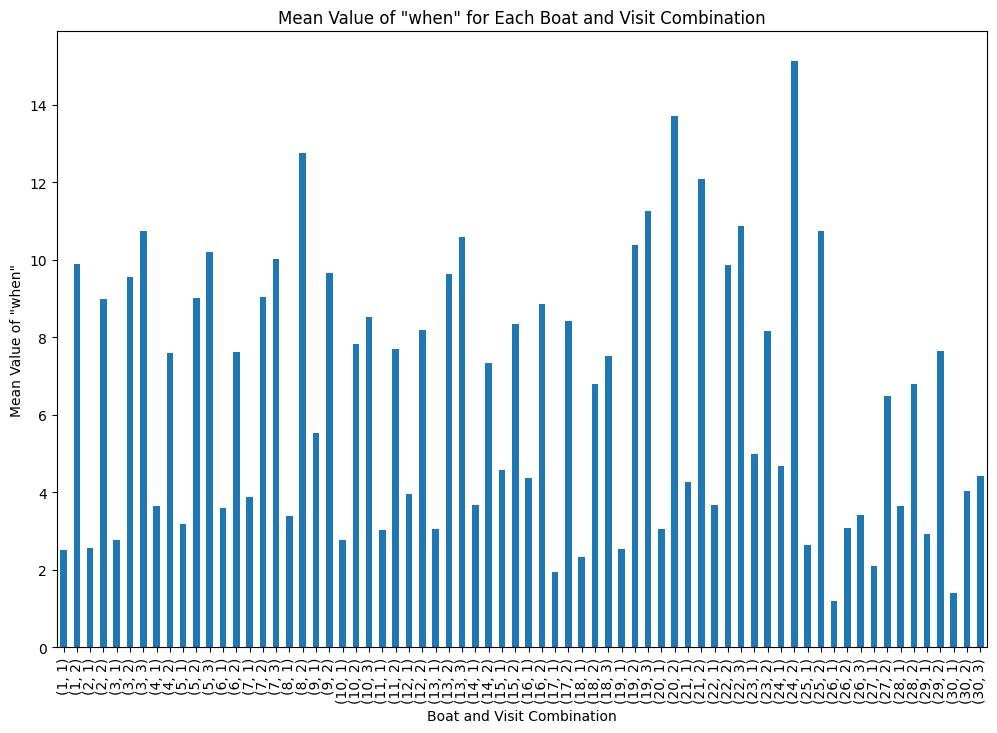

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# calculate mean of 'when' column for each n/c combination
df_mean_when = dataset.groupby(['n', 'c'])['when'].mean()

# create bar plot
ax = df_mean_when.plot(kind='bar', figsize=(12, 8))

# add labels and title
ax.set_xlabel('Boat and Visit Combination')
ax.set_ylabel('Mean Value of "when"')
ax.set_title('Mean Value of "when" for Each Boat and Visit Combination')

# show plot
plt.show()


## Without the visits

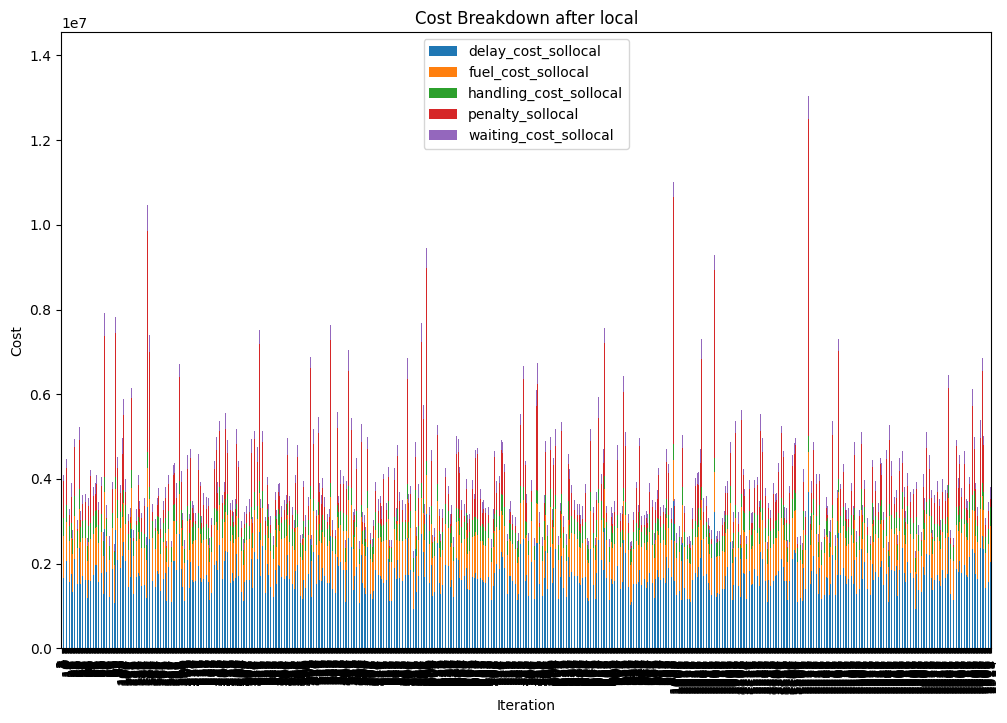

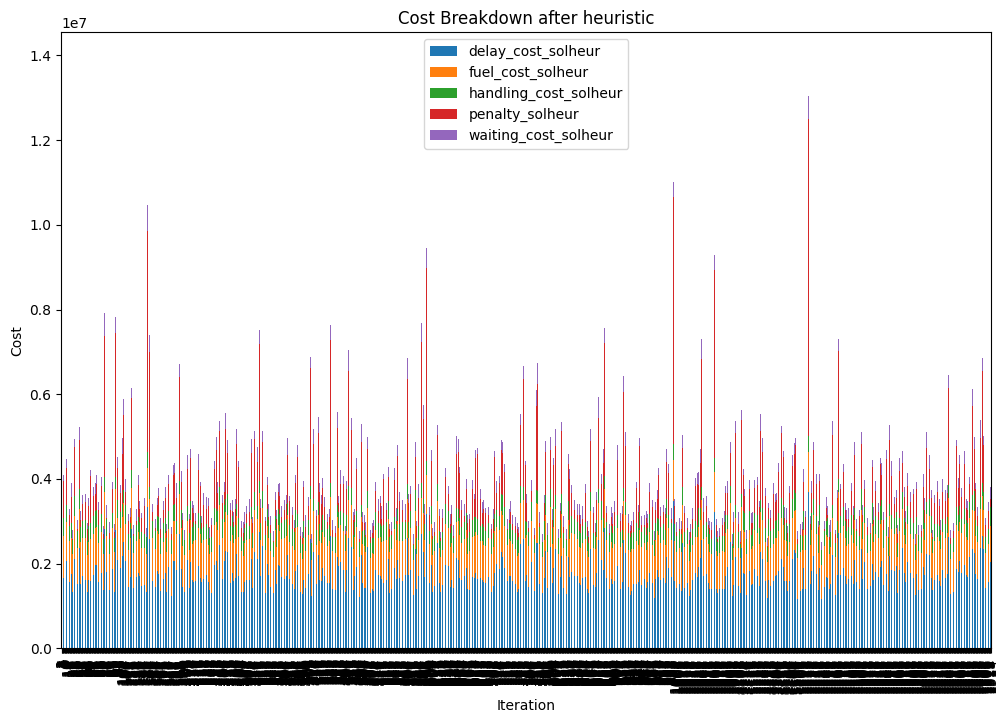

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# create dataset
dataset_subset = dataset[dataset['iter'] <= max(dataset['iter'])]
# create pivot table for solocal columns
df_pivot_solocal = pd.pivot_table(dataset_subset, values=['delay_cost_sollocal', 'penalty_sollocal', 'fuel_cost_sollocal', 'handling_cost_sollocal', 'waiting_cost_sollocal'], index=['iter'])

# create pivot table for solheur columns
df_pivot_solheur = pd.pivot_table(dataset_subset, values=['delay_cost_solheur', 'penalty_solheur', 'fuel_cost_solheur', 'handling_cost_solheur', 'waiting_cost_solheur'], index=['iter'])

# create stacked bar plot for solocal columns
ax1 = df_pivot_solocal.plot(kind='bar', stacked=True, figsize=(12, 8))

# add labels and title for solocal columns
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Cost')
ax1.set_title('Cost Breakdown after local')

# create stacked bar plot for solheur columns
ax2 = df_pivot_solheur.plot(kind='bar', stacked=True, figsize=(12, 8))

# add labels and title for solheur columns
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Cost')
ax2.set_title('Cost Breakdown after heuristic')

# show plots
plt.show()


### What times for the Heuristic and the Local search ?

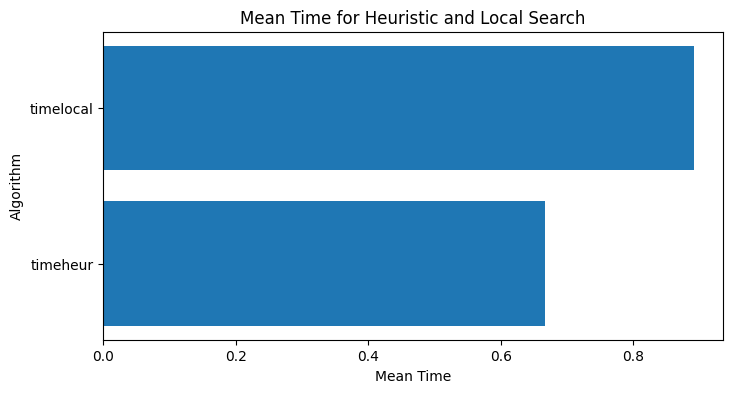

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# calculate mean of timeheur and timelocal across all iterations
mean_timeheur = dataset['timeheur'].mean()
mean_timelocal = dataset['timelocal'].mean()

# plot horizontal bar chart
fig, ax = plt.subplots(figsize=(8, 4))

ax.barh(['timeheur', 'timelocal'], [mean_timeheur, mean_timelocal])
ax.set_xlabel('Mean Time')
ax.set_ylabel('Algorithm')
ax.set_title('Mean Time for Heuristic and Local Search')

plt.show()


### Get the cost evolution

In [24]:
dataset[dataset['iter'] == 1].columns

Index(['iter', 'inst', 'objectif', 'cost_solheur', 'delay_cost_solheur',
       'waiting_cost_solheur', 'penalty_solheur', 'handling_cost_solheur',
       'fuel_cost_solheur', 'cost_sollocal', 'delay_cost_sollocal',
       'waiting_cost_sollocal', 'penalty_sollocal', 'handling_cost_sollocal',
       'fuel_cost_sollocal', 'timeheur', 'timelocal', 'oneboatdistance',
       'oneboatcost', 'oneboattime', 'allboatsdist', 'allboatstime',
       'allboatscost', 'rateconstained', 'failed', 'better', 'reconstruct',
       'pathrelinking', 'usedLocalSearch', 'average_cost_elite',
       'average_dist_elite', 'pushimprove'],
      dtype='object')

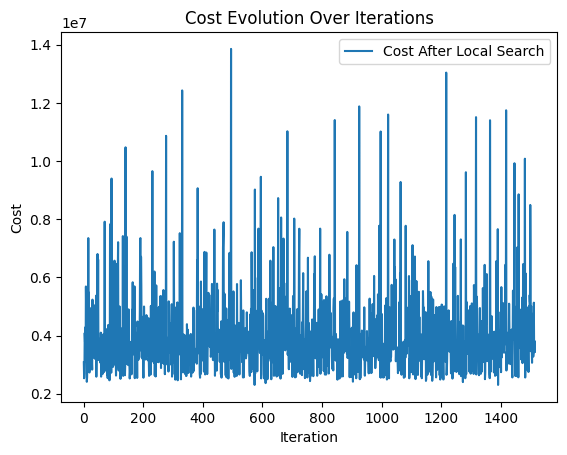

In [25]:
import matplotlib.pyplot as plt


# Group by 'iter' and extract the relevant cost columns
average_costs = dataset.groupby('iter').agg({
    'cost_solheur': 'first',
    'cost_sollocal': 'first',
    'delay_cost_solheur': 'first',
    'delay_cost_sollocal': 'first',
    'waiting_cost_solheur': 'first',
    'waiting_cost_sollocal': 'first',
    'penalty_solheur': 'first',
    'penalty_sollocal': 'first',
    'handling_cost_solheur': 'first',
    'handling_cost_sollocal': 'first',
    'fuel_cost_solheur': 'first',
    'fuel_cost_sollocal': 'first'
}).reset_index()

# Extract the relevant columns for plotting
iterations = average_costs['iter']


cost_after_heuristic = average_costs['cost_solheur']
cost_after_local_search = average_costs['cost_sollocal']

# Plot the lines
#plt.plot(iterations, cost_after_heuristic, label='Cost After Heuristic', marker='o')
plt.plot(iterations, cost_after_local_search, label='Cost After Local Search')

# Adding titles and labels
plt.title('Cost Evolution Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.legend()

# Show plot
plt.show()


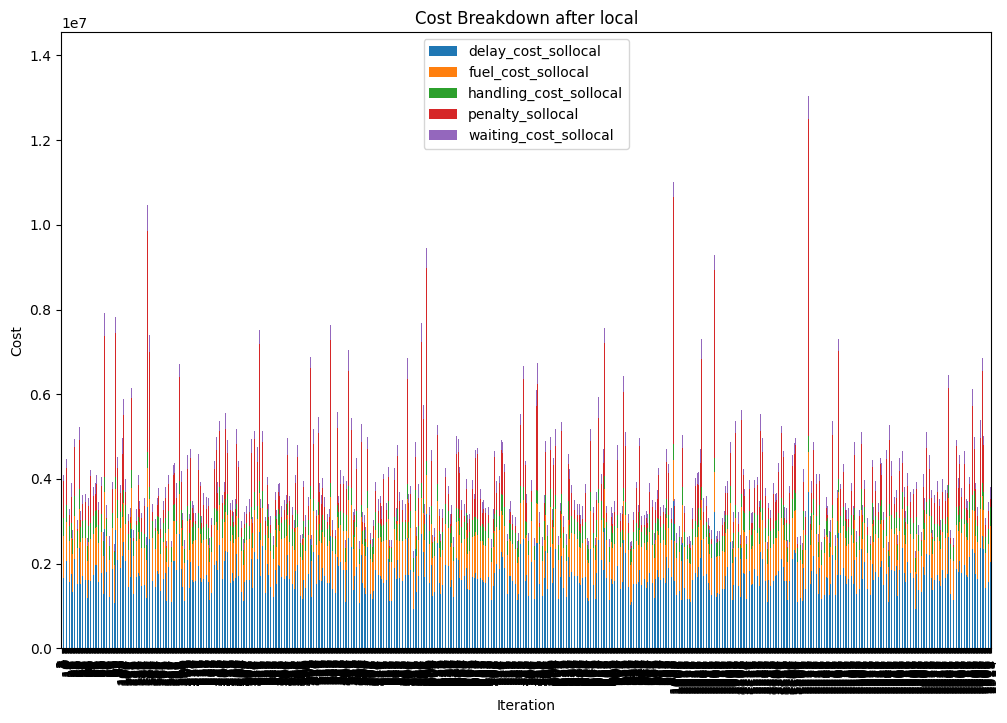

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# create dataset
dataset_subset = dataset[dataset['iter'] <= max(dataset['iter'])]
# create pivot table for solocal columns
df_pivot_solocal = pd.pivot_table(dataset_subset, values=['delay_cost_sollocal', 'penalty_sollocal', 'fuel_cost_sollocal', 'handling_cost_sollocal', 'waiting_cost_sollocal'], index=['iter'])

# create pivot table for solheur columns
df_pivot_solheur = pd.pivot_table(dataset_subset, values=['delay_cost_solheur', 'penalty_solheur', 'fuel_cost_solheur', 'handling_cost_solheur', 'waiting_cost_solheur'], index=['iter'])

# create stacked bar plot for solocal columns
ax1 = df_pivot_solocal.plot(kind='bar', stacked=True, figsize=(12, 8))

# add labels and title for solocal columns
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Cost')
ax1.set_title('Cost Breakdown after local')

# create stacked bar plot for solheur columns
#ax2 = df_pivot_solheur.plot(kind='bar', stacked=True, figsize=(12, 8))

# add labels and title for solheur columns
#ax2.set_xlabel('Iteration')
#ax2.set_ylabel('Cost')
#ax2.set_title('Cost Breakdown after heuristic')

# show plots
plt.show()

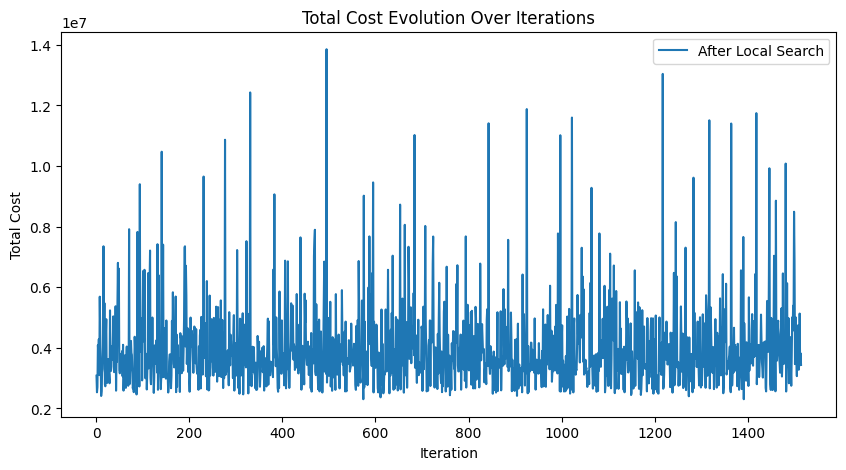

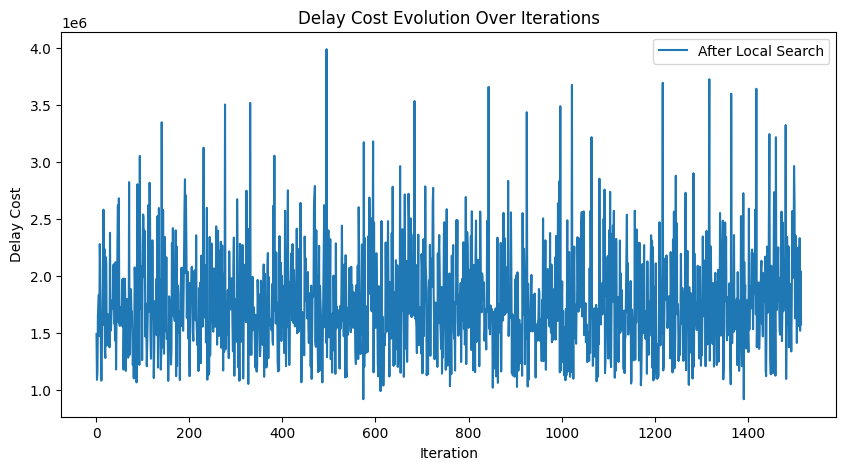

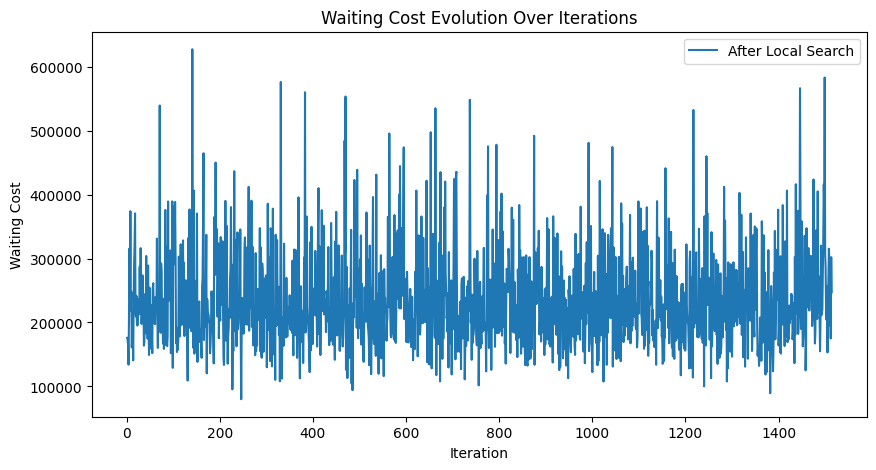

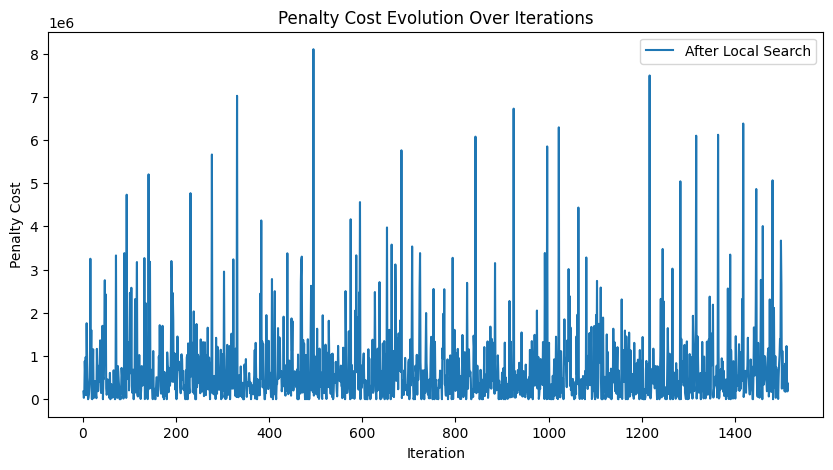

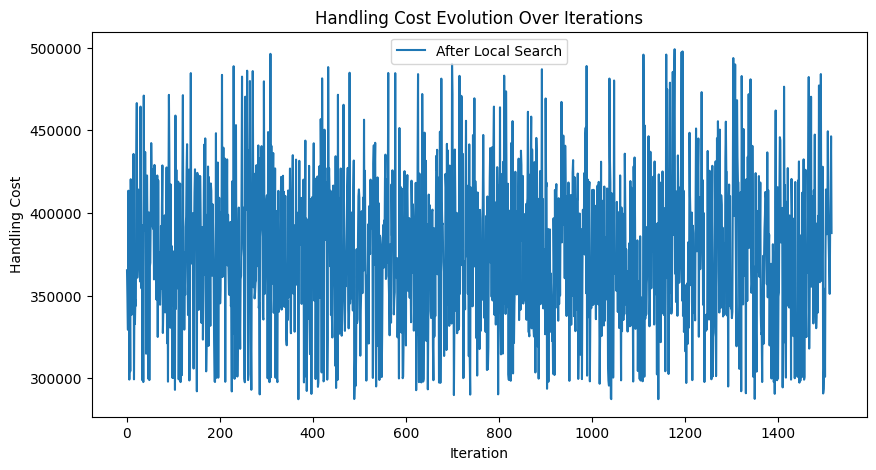

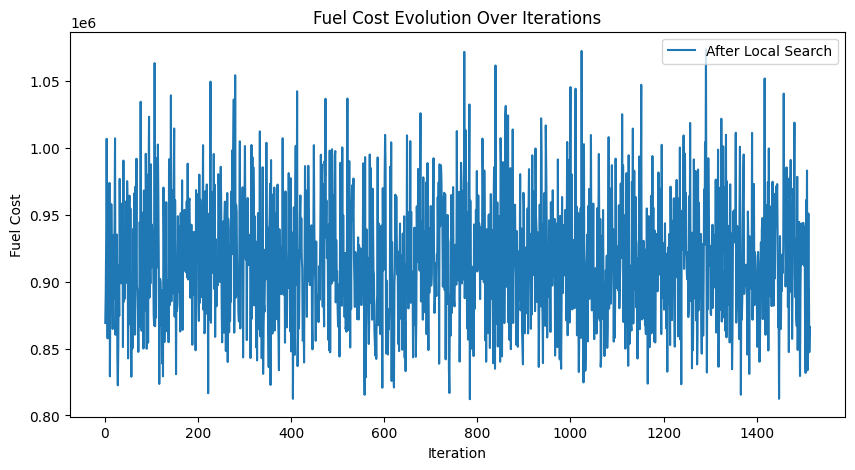

In [27]:
import matplotlib.pyplot as plt

# Costs for plotting
costs_for_plotting = [
    ('cost_solheur', 'cost_sollocal', 'Total Cost'),
    ('delay_cost_solheur', 'delay_cost_sollocal', 'Delay Cost'),
    ('waiting_cost_solheur', 'waiting_cost_sollocal', 'Waiting Cost'),
    ('penalty_solheur', 'penalty_sollocal', 'Penalty Cost'),
    ('handling_cost_solheur', 'handling_cost_sollocal', 'Handling Cost'),
    ('fuel_cost_solheur', 'fuel_cost_sollocal', 'Fuel Cost')
]

# Plotting
for cost_heur, cost_local, cost_name in costs_for_plotting:
    plt.figure(figsize=(10, 5))

    # Plot the lines
    #plt.plot(iterations, average_costs[cost_heur], label='After Heuristic', marker='o')
    plt.plot(iterations, average_costs[cost_local], label='After Local Search')

    # Adding titles and labels
    plt.title(f'{cost_name} Evolution Over Iterations')
    plt.xlabel('Iteration')
    plt.ylabel(cost_name)
    plt.legend()

    # Show plot
    plt.show()


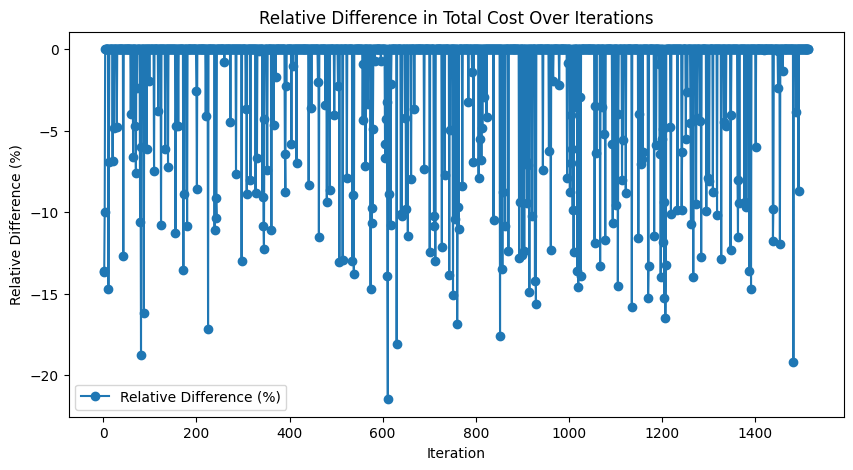

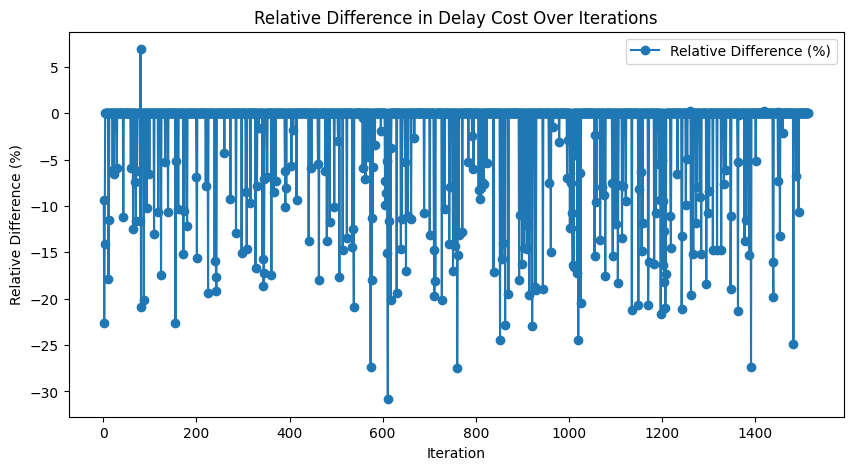

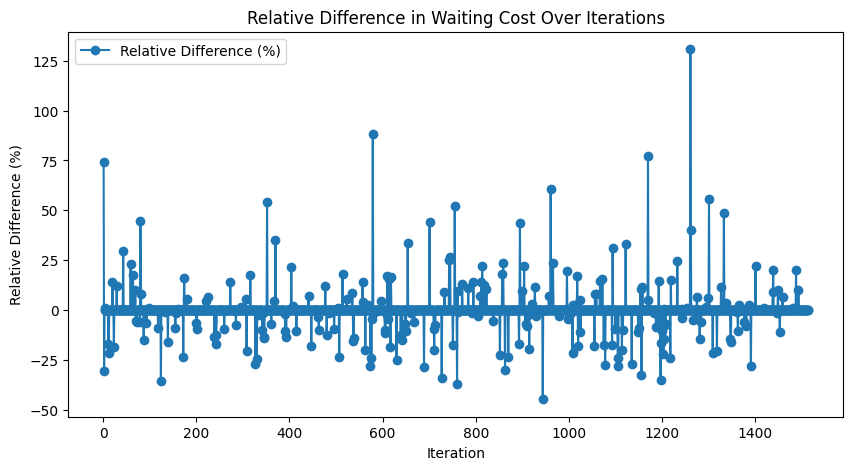

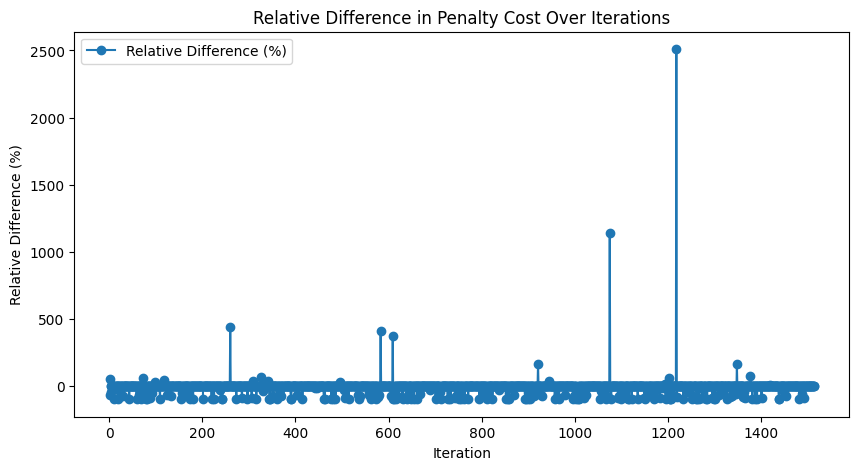

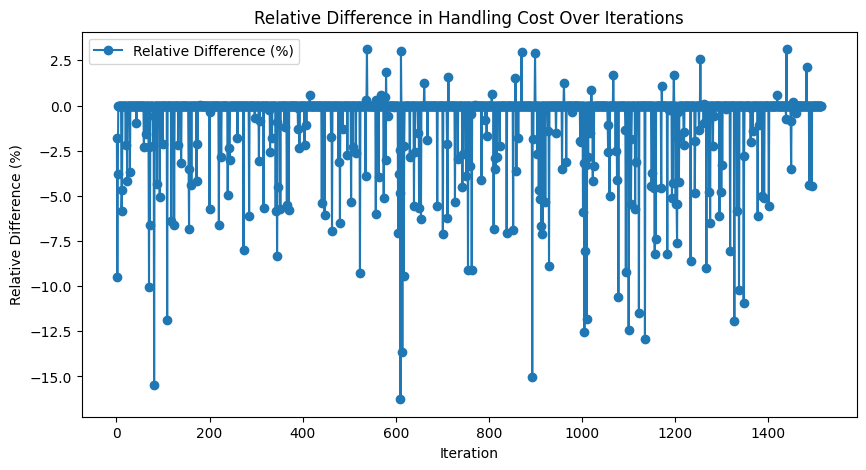

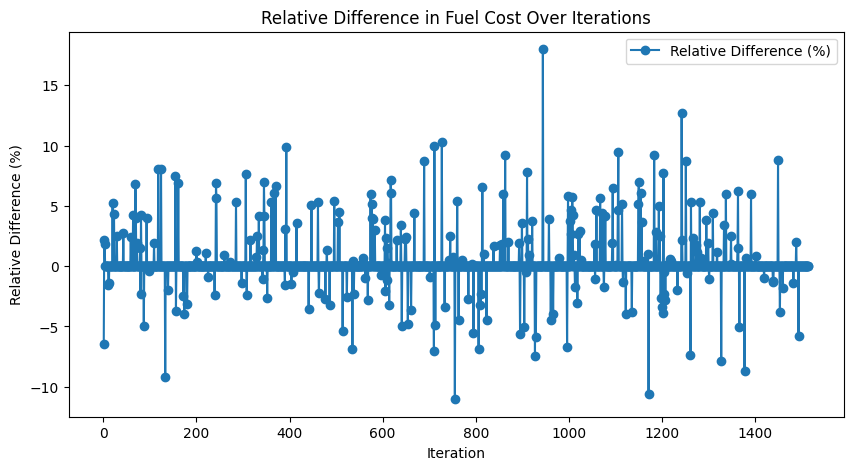

In [23]:
# Plotting
for cost_heur, cost_local, cost_name in costs_for_plotting:
    plt.figure(figsize=(10, 5))

    # Calculate the relative difference as a percentage
    relative_difference = 100 * (average_costs[cost_local] - average_costs[cost_heur]) / average_costs[cost_heur]

    # Plot the line
    plt.plot(iterations, relative_difference, label='Relative Difference (%)', marker='o')

    # Adding titles and labels
    plt.title(f'Relative Difference in {cost_name} Over Iterations')
    plt.xlabel('Iteration')
    plt.ylabel('Relative Difference (%)')
    plt.legend()

    # Show plot
    plt.show()

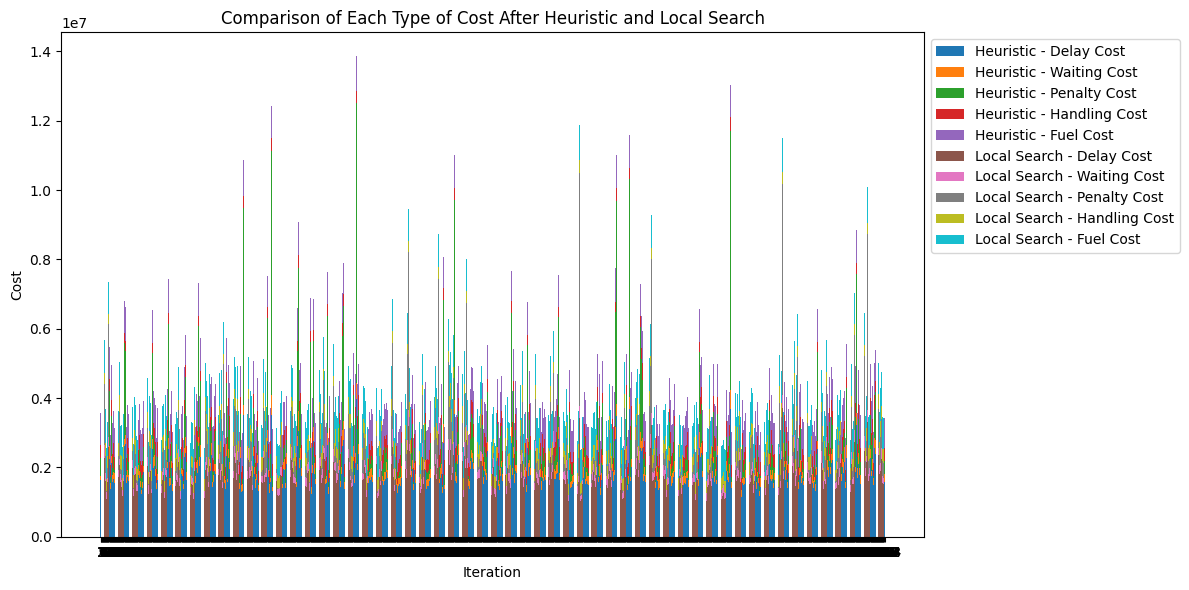

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming your dataset is loaded as `dataset`

# Group by 'iter' and extract the relevant cost columns
average_costs = dataset.groupby('iter').agg({
    'cost_solheur': 'first',
    'cost_sollocal': 'first',
    'delay_cost_solheur': 'first',
    'delay_cost_sollocal': 'first',
    'waiting_cost_solheur': 'first',
    'waiting_cost_sollocal': 'first',
    'penalty_solheur': 'first',
    'penalty_sollocal': 'first',
    'handling_cost_solheur': 'first',
    'handling_cost_sollocal': 'first',
    'fuel_cost_solheur': 'first',
    'fuel_cost_sollocal': 'first'
}).reset_index()

# Extract the relevant columns for plotting
iterations = average_costs['iter']

# Costs for plotting
cost_types = [
    ('delay_cost_solheur', 'delay_cost_sollocal', 'Delay Cost'),
    ('waiting_cost_solheur', 'waiting_cost_sollocal', 'Waiting Cost'),
    ('penalty_solheur', 'penalty_sollocal', 'Penalty Cost'),
    ('handling_cost_solheur', 'handling_cost_sollocal', 'Handling Cost'),
    ('fuel_cost_solheur', 'fuel_cost_sollocal', 'Fuel Cost')
]

# Plotting costs for heuristic and local search step in one graph
plt.figure(figsize=(12, 6))

bar_width = 0.4
bar_positions_heuristic = np.arange(len(iterations))
bar_positions_local = bar_positions_heuristic + bar_width

# Plotting costs for heuristic step
bottom = np.zeros(len(iterations))
for heur, local, name in cost_types:
    plt.bar(bar_positions_heuristic, average_costs[heur], width=bar_width, label=f'Heuristic - {name}', bottom=bottom)
    bottom += average_costs[heur]

# Plotting costs for local search step
bottom = np.zeros(len(iterations))
for heur, local, name in cost_types:
    plt.bar(bar_positions_local, average_costs[local], width=bar_width, label=f'Local Search - {name}', bottom=bottom)
    bottom += average_costs[local]

plt.title('Comparison of Each Type of Cost After Heuristic and Local Search')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.xticks(bar_positions_heuristic + bar_width / 2, iterations)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


In [ ]:
dataset[dataset['reconstruct']==0]

,iter,n,c,port,cost_visit,delay_cost_visit,when,tacticall_chosen,tacticboat_chosen,penalty_visit,...,oneboatdistance,oneboatcost,oneboattime,allboatscount,allboatstime,allboatscost,rateconstained,failed,reconstruct,usedCPLEX
0,1,1,1,1,31275,6892,0,,,0,...,"[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3333333333333333, 0.3333333333333333, 0.333...",0.0,0.0,0.0
1,1,1,2,2,81936,36565,0,,,0,...,"[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3333333333333333, 0.3333333333333333, 0.333...",0.0,0.0,0.0
2,1,2,1,1,24515,316,0,,,0,...,"[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3333333333333333, 0.3333333333333333, 0.333...",0.0,0.0,0.0
3,1,2,2,2,81028,33390,0,,,0,...,"[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3333333333333333, 0.3333333333333333, 0.333...",0.0,0.0,0.0
4,1,3,1,1,16574,271,0,,,0,...,"[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3333333333333333, 0.3333333333333333, 0.333...",0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16305,233,29,1,2,25695,664,0,,,0,...,"[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3320191623230018, 0.3402649564375816, 0.327...","[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3333333333333333, 0.3333333333333333, 0.333...","[0.33726974399490095, 0.3336126015030642, 0.32...","[0.32795415345244366, 0.3321357978326063, 0.33...",0.0,0.0,0.0
16306,233,29,2,1,92936,41034,0,,,0,...,"[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3320191623230018, 0.3402649564375816, 0.327...","[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3333333333333333, 0.3333333333333333, 0.333...","[0.33726974399490095, 0.3336126015030642, 0.32...","[0.32795415345244366, 0.3321357978326063, 0.33...",0.0,0.0,0.0
16307,233,30,1,3,43187,14784,20,cost,time,0,...,"[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3320191623230018, 0.3402649564375816, 0.327...","[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3333333333333333, 0.3333333333333333, 0.333...","[0.33726974399490095, 0.3336126015030642, 0.32...","[0.32795415345244366, 0.3321357978326063, 0.33...",0.0,0.0,0.0
16308,233,30,2,1,72339,21147,44,cost,time,0,...,"[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3320191623230018, 0.3402649564375816, 0.327...","[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3333333333333333, 0.3333333333333333, 0.333...","[0.33726974399490095, 0.3336126015030642, 0.32...","[0.32795415345244366, 0.332135797832606

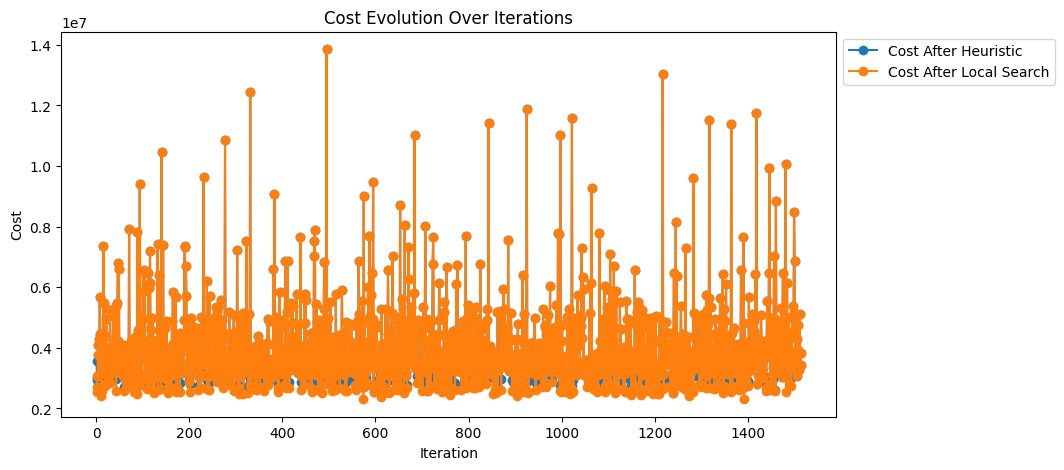

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming your dataset is loaded as `dataset`

# Group by 'iter' and extract the relevant cost columns and usage of reconstruct and CPLEX
average_costs = dataset.groupby('iter').agg({
    'cost_solheur': 'first',
    'cost_sollocal': 'first',
    'reconstruct': 'first'
}).reset_index()

# Extract the relevant columns for plotting
iterations = average_costs['iter']
cost_after_heuristic = average_costs['cost_solheur']
cost_after_local_search = average_costs['cost_sollocal']
reconstruct_used = average_costs['reconstruct']

# Plot the lines
plt.figure(figsize=(10, 5))
plt.plot(iterations, cost_after_heuristic, label='Cost After Heuristic', marker='o')
plt.plot(iterations, cost_after_local_search, label='Cost After Local Search', marker='o')

# Mark the points where reconstruct was used
for idx, (cost, recon) in enumerate(zip(cost_after_heuristic, reconstruct_used)):
    if recon == 1:
        plt.scatter(iterations[idx], cost, label='Used Reconstruct' if 'Used Reconstruct' not in plt.gca().get_legend_handles_labels()[1] else "", c='red', marker='^')

# Adding titles and labels
plt.title('Cost Evolution Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.legend(loc="upper left", bbox_to_anchor=(1,1))

# Show plot
plt.show()


In [ ]:
dataset[dataset['usedCPLEX']==dataset['reconstruct']]

,iter,n,c,port,cost_visit,delay_cost_visit,when,tacticall_chosen,tacticboat_chosen,penalty_visit,...,oneboatdistance,oneboatcost,oneboattime,allboatscount,allboatstime,allboatscost,rateconstained,failed,reconstruct,usedCPLEX
0,1,1,1,1,31275,6892,0,,,0,...,"[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3333333333333333, 0.3333333333333333, 0.333...",0.0,0.0,0.0
1,1,1,2,2,81936,36565,0,,,0,...,"[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3333333333333333, 0.3333333333333333, 0.333...",0.0,0.0,0.0
2,1,2,1,1,24515,316,0,,,0,...,"[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3333333333333333, 0.3333333333333333, 0.333...",0.0,0.0,0.0
3,1,2,2,2,81028,33390,0,,,0,...,"[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3333333333333333, 0.3333333333333333, 0.333...",0.0,0.0,0.0
4,1,3,1,1,16574,271,0,,,0,...,"[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3333333333333333, 0.3333333333333333, 0.333...",0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16305,233,29,1,2,25695,664,0,,,0,...,"[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3320191623230018, 0.3402649564375816, 0.327...","[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3333333333333333, 0.3333333333333333, 0.333...","[0.33726974399490095, 0.3336126015030642, 0.32...","[0.32795415345244366, 0.3321357978326063, 0.33...",0.0,0.0,0.0
16306,233,29,2,1,92936,41034,0,,,0,...,"[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3320191623230018, 0.3402649564375816, 0.327...","[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3333333333333333, 0.3333333333333333, 0.333...","[0.33726974399490095, 0.3336126015030642, 0.32...","[0.32795415345244366, 0.3321357978326063, 0.33...",0.0,0.0,0.0
16307,233,30,1,3,43187,14784,20,cost,time,0,...,"[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3320191623230018, 0.3402649564375816, 0.327...","[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3333333333333333, 0.3333333333333333, 0.333...","[0.33726974399490095, 0.3336126015030642, 0.32...","[0.32795415345244366, 0.3321357978326063, 0.33...",0.0,0.0,0.0
16308,233,30,2,1,72339,21147,44,cost,time,0,...,"[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3320191623230018, 0.3402649564375816, 0.327...","[0.3333333333333333, 0.3333333333333333, 0.333...","[0.3333333333333333, 0.3333333333333333, 0.333...","[0.33726974399490095, 0.3336126015030642, 0.32...","[0.32795415345244366, 0.332135797832606

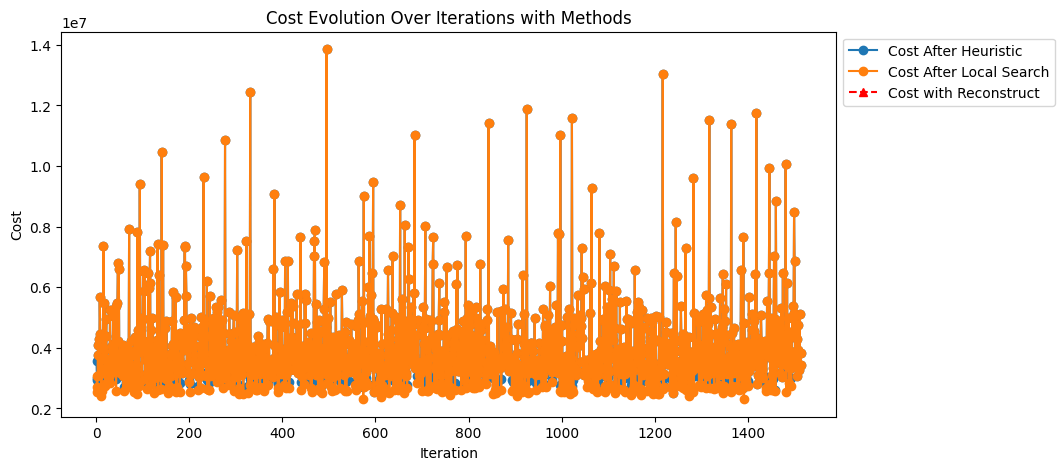

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming your dataset is loaded as `dataset`

# Group by 'iter' and extract the relevant cost columns and usage of reconstruct and CPLEX
average_costs = dataset.groupby('iter').agg({
    'cost_solheur': 'first',
    'cost_sollocal': 'first',
    'reconstruct': 'first',
}).reset_index()

# Extract the relevant columns for plotting
iterations = average_costs['iter']
cost_after_heuristic = average_costs['cost_solheur']
cost_after_local_search = average_costs['cost_sollocal']
reconstruct_used = average_costs['reconstruct']

# Plot the original lines
plt.figure(figsize=(10, 5))
plt.plot(iterations, cost_after_heuristic, label='Cost After Heuristic', marker='o')
plt.plot(iterations, cost_after_local_search, label='Cost After Local Search', marker='o')

# Plot the lines for reconstruct and CPLEX
reconstruct_iterations = iterations[reconstruct_used == 1]
reconstruct_costs = cost_after_local_search[reconstruct_used == 1]
plt.plot(reconstruct_iterations, reconstruct_costs, label='Cost with Reconstruct', linestyle='--', marker='^', color='red')

# Adding titles and labels
plt.title('Cost Evolution Over Iterations with Methods')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.legend(loc="upper left", bbox_to_anchor=(1,1))

# Show plot
plt.show()


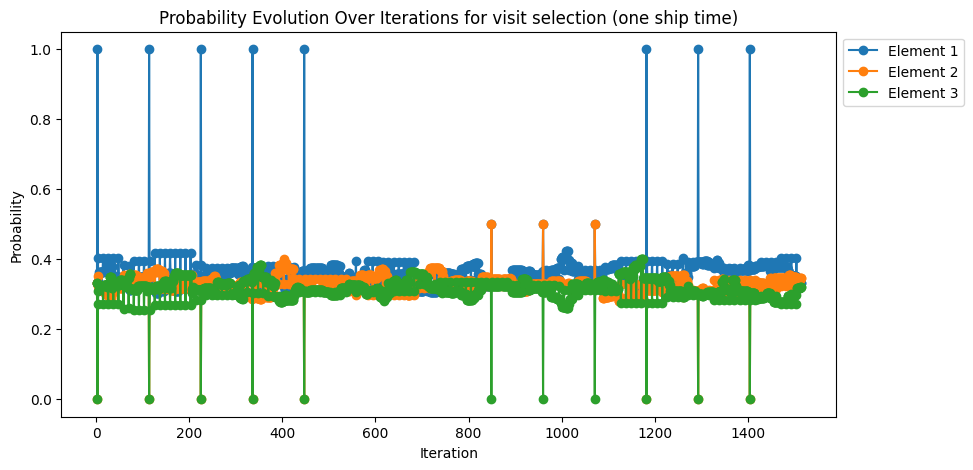

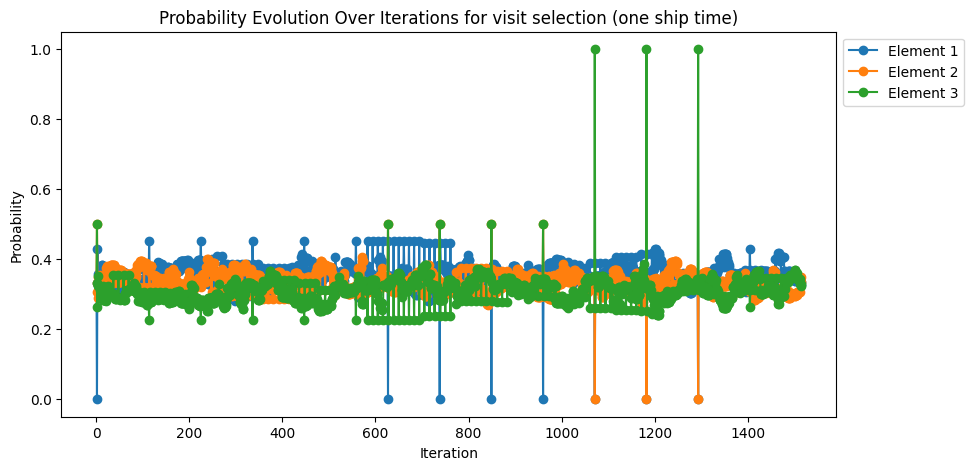

In [35]:
import matplotlib.pyplot as plt

# Group by 'iter' and extract the relevant columns
average_probabilities = dataset.groupby('iter').agg({
    'allboatstime': 'first',
    'oneboattime': 'first'
}).reset_index()

# Extract the relevant columns for plotting
iterations = average_probabilities['iter']
proba_boat = average_probabilities['allboatstime']
proba_all = average_probabilities['oneboattime']

# List of columns to plot
columns_to_plot = ['allboatstime', 'oneboattime']
# Loop through the columns
for column_name, probabilities in zip(columns_to_plot, [proba_boat, proba_all]):
    
    # Determine the number of elements in the lists
    num_elements = len(probabilities.iloc[0])
    
    # Create a new figure for each column
    plt.figure(figsize=(10, 5))
    
    # Loop through each element in the lists
    for element_idx in range(num_elements):
        
        # Extract the probability element across all iterations
        element_probabilities = [prob_list[element_idx] for prob_list in probabilities]
        
        # Plot the probability evolution of each element in the list
        plt.plot(iterations, element_probabilities, marker='o', label=f'Element {element_idx+1}')
    
    # Adding titles and labels
    plt.title(f'Probability Evolution Over Iterations for visit selection (one ship time)')
    plt.xlabel('Iteration')
    plt.ylabel('Probability')
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))

    # Show plot
    plt.show()


> Question and conclusion needs to have a back and fourth

### Main ideas from that already : 

- The reactive GRASP is not reactive at all, too much parameters and not enough simulations to update the probabilities.
- The penalty is really difficult to optimize for the greedy heuristic -> goal of the local search. Can we put more focus on that ?
- Regarding the when value, is it enough random ? If we remove some parameters how can implement the reactive GRASP ? Should it be reactive ? Should we for it to be more random ? 
- Add earliest
- Put hard constraint in CPLEX

Given the number of iterations -> difficult to make it reactive, better to have a fix parameters and optimize it. 